In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/Datasets/naukri_com-job_sample[1].csv')
print(df.shape)
print(df.columns)
df.head()


(22000, 14)
Index(['company', 'education', 'experience', 'industry', 'jobdescription',
       'jobid', 'joblocation_address', 'jobtitle', 'numberofpositions',
       'payrate', 'postdate', 'site_name', 'skills', 'uniq_id'],
      dtype='object')


,company,education,experience,industry,jobdescription,jobid,joblocation_address,jobtitle,numberofpositions,payrate,postdate,site_name,skills,uniq_id
0,MM Media Pvt Ltd,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,0 - 1 yrs,Media / Entertainment / Internet,Job Description Send me Jobs like this Quali...,210516002263,Chennai,Walkin Data Entry Operator (night Shift),NaN,"1,50,000 - 2,25,000 P.A",2016-05-21 19:30:00 +0000,NaN,ITES,43b19632647068535437c774b6ca6cf8
1,find live infotech,UG: B.Tech/B.E. - Any Specialization PG:MBA/PG...,0 - 0 yrs,Advertising / PR / MR / Event Management,Job Description Send me Jobs like this Quali...,210516002391,Chennai,Work Based Onhome Based Part Time.,60.0,"1,50,000 - 2,50,000 P.A. 20000",2016-05-21 19:30:00 +0000,NaN,Marketing,d4c72325e57f89f364812b5ed5a795f0
2,Softtech Career Infosystem Pvt. Ltd,UG: Any Graduate - Any Specialization PG:Any P...,4 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this - as ...,101016900534,Bengaluru,Pl/sql Developer - SQL,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,c47df6f4cfdf5b46f1fd713ba61b9eba
3,Onboard HRServices LLP,UG: Any Graduate - Any Specialization PG:CA Do...,11 - 15 yrs,Banking / Financial Services / Broking,Job Description Send me Jobs like this - Inv...,81016900536,"Mumbai, Bengaluru, Kolkata, Chennai, Coimbator...",Manager/ad/partner - Indirect Tax - CA,NaN,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,Accounts,115d28f140f694dd1cc61c53d03c66ae
4,Spire Technologies and Solutions Pvt. Ltd.,UG: B.Tech/B.E. - Any Specialization PG:Any Po...,6 - 8 yrs,IT-Software / Software Services,Job Description Send me Jobs like this Pleas...,120916002122,Bengaluru,JAVA Technical Lead (6-8 yrs) -,4.0,Not Disclosed by Recruiter,2016-10-13 16:20:55 +0000,NaN,IT Software - Application Programming,a12553fc03bc7bcced8b1bb8963f97b4


In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['Job URL', 'Job ID'], errors='ignore')

# Rename columns
df.columns = [col.lower().strip().replace(' ', '_') for col in df.columns]

# Drop missing job titles or companies
df = df.dropna(subset=['jobtitle', 'company'])

# Extract min and max experience from 'experience' column
df[['exp_min', 'exp_max']] = df['experience'].str.extract(r'(\d+)[^\d]+(\d+)?')

# Convert extracted values to numeric
df['exp_min'] = pd.to_numeric(df['exp_min'], errors='coerce')
df['exp_max'] = pd.to_numeric(df['exp_max'], errors='coerce')

# Optional: create an average experience column
df['exp_avg'] = df[['exp_min', 'exp_max']].mean(axis=1)


In [ ]:
# Extract top keywords from skill column
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(df['skills'].dropna())
skill_counts = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
top_skills = skill_counts.sum().sort_values(ascending=False).head(20)
print(top_skills)


software          9085
programming       6227
application       5989
sales             2893
ites              1640
teaching          1091
hr                 928
marketing          868
accounts           860
engineering        704
production         667
design             609
medical            418
services           416
financial          413
administration     372
network            372
erp                354
testing            342
qa                 342
dtype: int64


In [ ]:
#Basic Info checking and null values
df.shape
df.info()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 21996 entries, 0 to 21999
Data columns (total 17 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              21996 non-null  object 
 1   education            20004 non-null  object 
 2   experience           21996 non-null  object 
 3   industry             21995 non-null  object 
 4   jobdescription       21996 non-null  object 
 5   jobid                21996 non-null  int64  
 6   joblocation_address  21499 non-null  object 
 7   jobtitle             21996 non-null  object 
 8   numberofpositions    4464 non-null   float64
 9   payrate              21903 non-null  object 
 10  postdate             21977 non-null  object 
 11  site_name            3987 non-null   object 
 12  skills               21472 non-null  object 
 13  uniq_id              21996 non-null  object 
 14  exp_min              21885 non-null  float64
 15  exp_max              21885 non-null  floa

,0
company,0
education,1992
experience,0
industry,1
jobdescription,0
jobid,0
joblocation_address,497
jobtitle,0
numberofpositions,17532
payrate,93


In [ ]:
df['min_exp'] = df['experience'].str.extract(r'(\d+)').astype(float)
df['exp_bucket'] = pd.cut(df['min_exp'],
                          bins=[0, 2, 5, 10, 50],
                          labels=['0–2 yrs', '2–5 yrs', '5–10 yrs', '10+ yrs'])

In [ ]:
df['salary_cleaned'] = df['payrate'].str.replace('₹', '').str.replace(',', '').str.extract(r'(\d+)').astype(float)

In [ ]:
df['city'] = df['joblocation_address'].str.split(',').str[0].str.strip()

In [ ]:
from collections import Counter

all_skills = df['skills'].dropna().str.lower().str.split(', ')
flat_skills = [skill for sublist in all_skills for skill in sublist]
skill_counts = pd.Series(Counter(flat_skills)).sort_values(ascending=False)

<Axes: title={'center': 'Top 10 Job Titles'}, xlabel='jobtitle'>

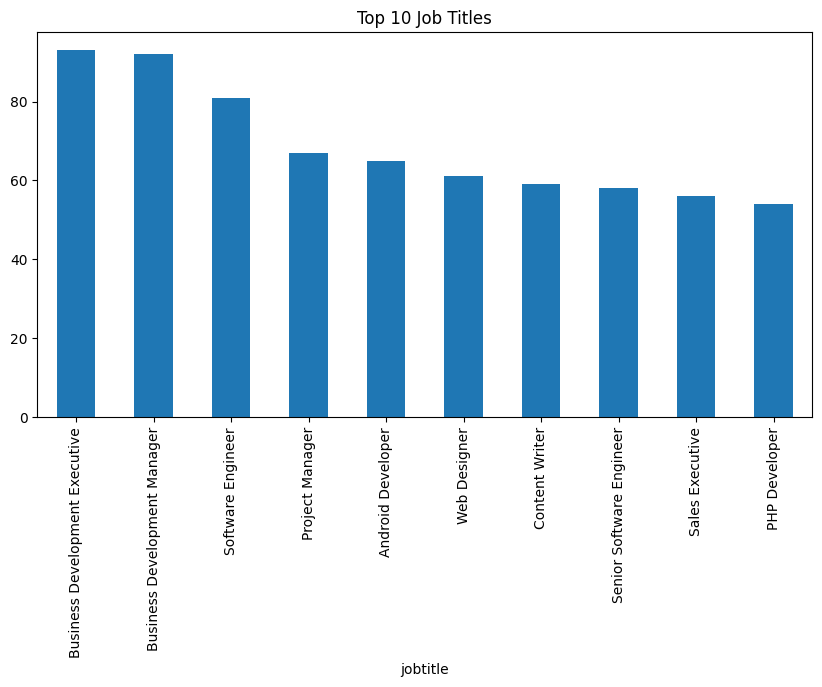

In [ ]:
# Top 10 job titles
df['jobtitle'].value_counts().head(10).plot(kind='bar', title='Top 10 Job Titles', figsize=(10,5))


<Axes: title={'center': 'Top Hiring Locations'}, xlabel='joblocation_address'>

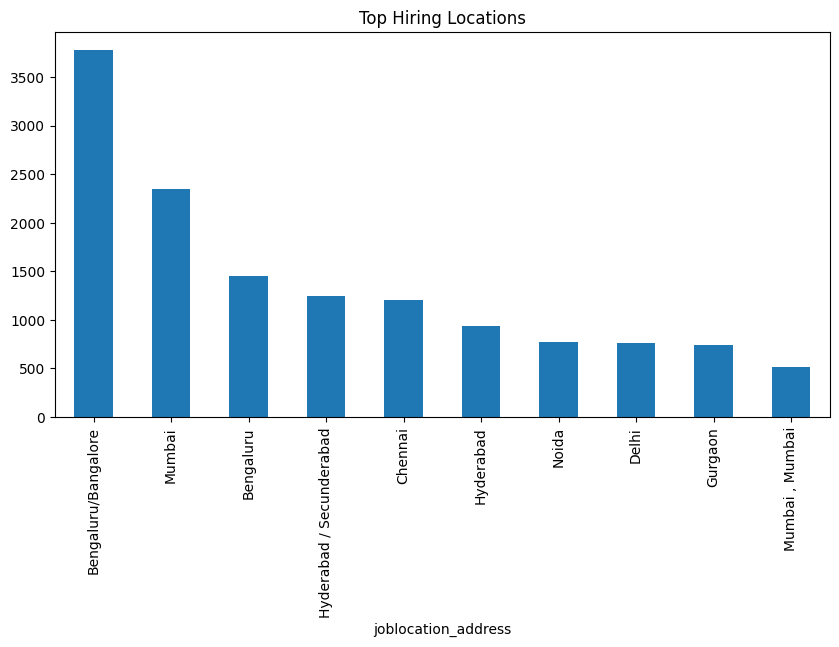

In [ ]:
#Plot Hiring cities
df['joblocation_address'].value_counts().nlargest(10).plot.bar(figsize=(10,5), title="Top Hiring Locations")


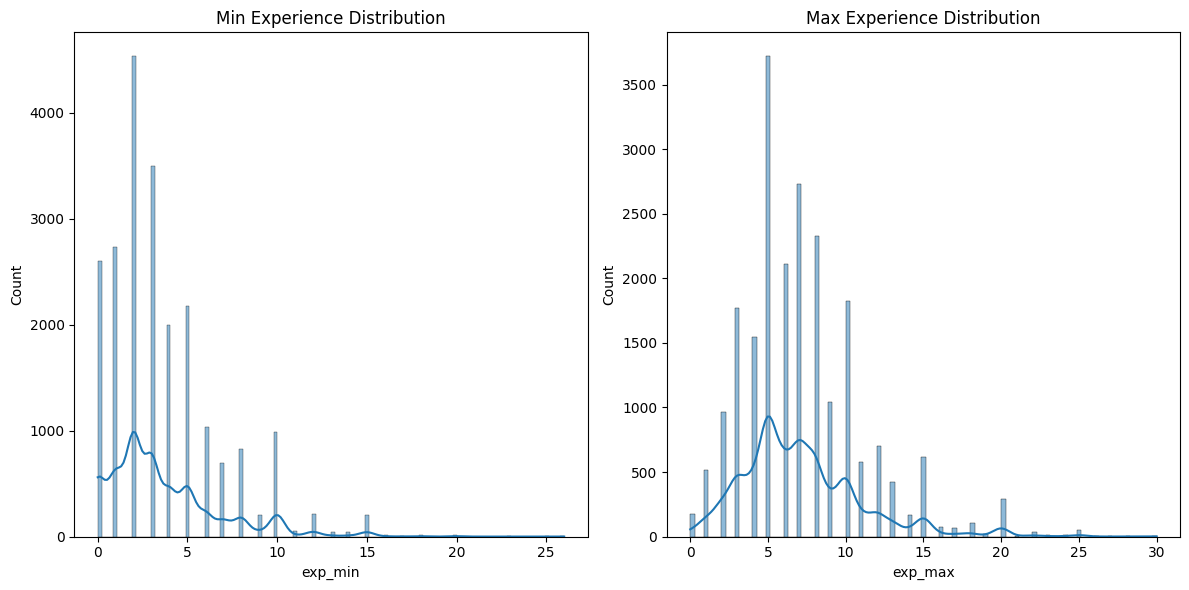

In [ ]:
# Drop unnecessary columns
df = df.drop(columns=['Job URL', 'Job ID'], errors='ignore')

# Rename columns
df.columns = [col.lower().strip().replace(' ', '_') for col in df.columns]

# Drop missing job titles or companies
df = df.dropna(subset=['jobtitle', 'company'])

# Extract min and max experience from 'experience' column
df[['exp_min', 'exp_max']] = df['experience'].str.extract(r'(\d+)[^\d]+(\d+)?')

# Convert extracted values to numeric
df['exp_min'] = pd.to_numeric(df['exp_min'], errors='coerce')
df['exp_max'] = pd.to_numeric(df['exp_max'], errors='coerce')

# Optional: create an average experience column
df['exp_avg'] = df[['exp_min', 'exp_max']].mean(axis=1)

# Experience Distribution
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1) # 1 row, 2 columns, 1st plot
sns.histplot(df['exp_min'].dropna(), kde=True)
plt.title('Min Experience Distribution')

plt.subplot(1, 2, 2) # 1 row, 2 columns, 2nd plot
sns.histplot(df['exp_max'].dropna(), kde=True)
plt.title('Max Experience Distribution')

plt.tight_layout() # Adjust layout to prevent overlapping titles
plt.show()

<Axes: title={'center': 'Top 15 Skills Demand'}, xlabel='Skill'>

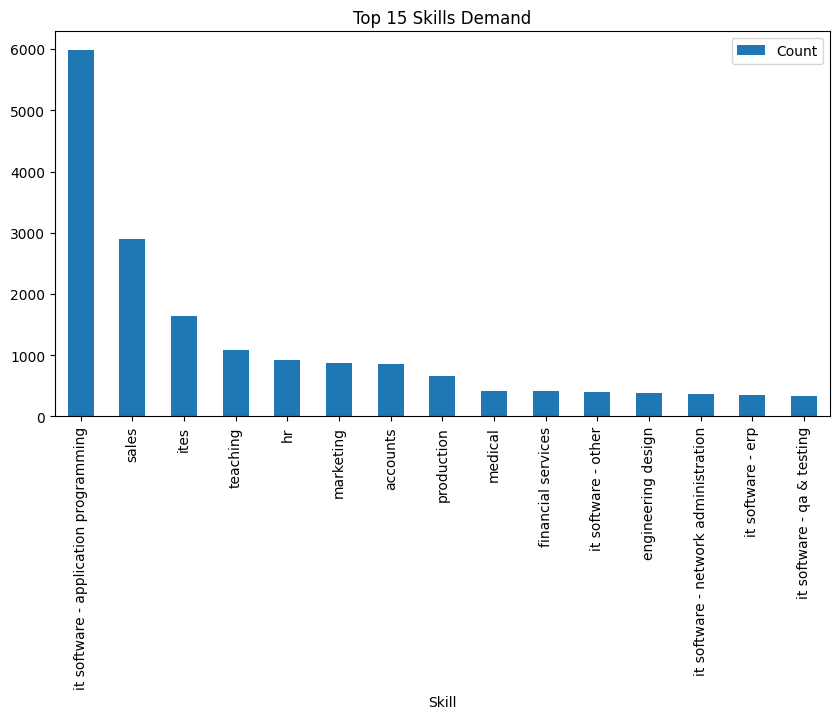

In [ ]:
# Checking and counting most demanded skills
from collections import Counter
skills_list = df['skills'].dropna().str.lower().str.split(',').sum()
skill_counts = Counter([s.strip() for s in skills_list])
pd.DataFrame(skill_counts.most_common(15), columns=['Skill','Count']).set_index('Skill').plot.bar(figsize=(10,5), title="Top 15 Skills Demand")


<Axes: title={'center': 'Top Hiring Companies'}, ylabel='company'>

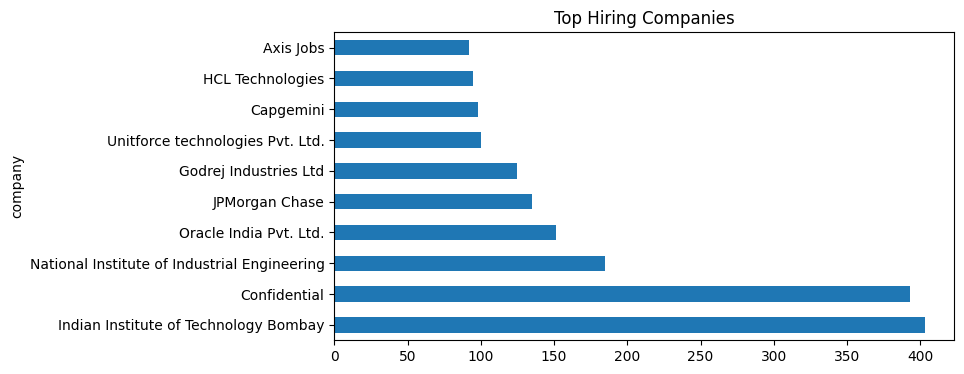

In [ ]:
# Top Hiring Compnies
df['company'].value_counts().nlargest(10).plot.barh(figsize=(8,4), title="Top Hiring Companies")


In [ ]:
df.to_csv("naukri_cleaned_jobs.csv", index=False)
from google.colab import files
files.download("naukri_cleaned_jobs.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>